Step 1: Understand the problem
Is it Regression or Classification?
We are trying to predict whether a transaction is fradulent or not (isFraud : True or False). 
This is a Classification Problem.

Step 2 : Setup the envionment
Installed scikit-learn

Step 3: Load cleaned dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/dataset_after_EDA.xlsx")


In [36]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  float64
 10  posConditionCode          641914 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

(641914, 32)

In [37]:
# changing datetime columun to datetime format
df2['transactionDateTime'] = pd.to_datetime(df2['transactionDateTime'])
df2["accountOpenDate"] = pd.to_datetime(df2["accountOpenDate"])
df2['currentExpDate'] = pd.to_datetime(df2['currentExpDate'])
df2['dateOfLastAddressChange'] = pd.to_datetime(df2['dateOfLastAddressChange'])
df2['transactionDateTime'].dtype
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

Step 4: Preprocessing
1. Drop unnecessary columns or use useful features only
2. Convert categorial variables ( use one-hot encoding or label 
encoding)
3. Split Features and target

In [38]:
# ✅ Choose meaningful features only
features = [
    'transactionAmount', 'availableMoney', 'creditLimit', 'currentBalance',
    'posEntryMode', 'posConditionCode', 'cardPresent','cvv_mismatch',
    'txn_hour', 'txn_month', 'weekday', 'is_weekend',
    'account_age_days',
    'transactionType',
    # 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode',
    # , 'txn_day','expirationDateKeyInMatch', 'age_bin'
]

X = df2[features]
y = df2['isFraud']


In [39]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Optional: scale if needed


Step 5: Train/Test Split

In [40]:
from sklearn.model_selection import train_test_split

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for testing
    random_state=42,      # Ensures reproducibility
    stratify=y            # Preserves fraud/non-fraud ratio
)


Step 6: Training model using K-Nearest Neighbors Alogrithm (KNN)

In [41]:
# 
# knn = KNeighborsClassifier(n_neighbors= 5)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))
#took long time and my laptop started heatin up

In [42]:
# from sklearn.neighbors import KNeighborsClassifier
# # Use a smaller sample to test if your code works
# X_train_small = X_train.sample(10000, random_state=42)
# y_train_small = y_train.loc[X_train_small.index]

# X_test_small = X_test.sample(2000, random_state=42)
# y_test_small = y_test.loc[X_test_small.index]

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_small, y_train_small)
# print(knn.score(X_test_small, y_test_small))


In [43]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_small_scaled = scaler.fit_transform(X_train_small)
# X_test_small_scaled = scaler.transform(X_test_small)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_small_scaled, y_train_small)
# print(knn.score(X_test_small_scaled, y_test_small))


In [44]:
# from sklearn.metrics import classification_report

# y_pred = knn.predict(X_test_small_scaled)
# print(classification_report(y_test_small, y_pred))


Step 7 : Trying different neighbors less than 5 to check if the computation becomes fast

In [45]:

# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))
#no again the laptop heated up

Step 7: Using Logistic Regression algorithm

Need to learn first .so tomorrow

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Scale features

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get actual feature names
if isinstance(X_train_scaled, pd.DataFrame):
    features_actual = X_train_scaled.columns.tolist()
else:
    features_actual = X_train.columns.tolist()


Train Logistic Regression with class balancing

In [48]:
model1 = LogisticRegression(max_iter=1000, class_weight='balanced')
model1.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Predict the scaled model

In [49]:
y_predict_LG = model1.predict(X_test_scaled)

Evaluate performance

In [50]:
print("Accuracy", accuracy_score(y_test, y_predict_LG))
print("confusion_matrix: \n", confusion_matrix(y_test,y_predict_LG))
print("Classification Report: \n", classification_report(y_test, y_predict_LG))

Accuracy 0.7192314682591199
confusion_matrix: 
 [[136659  52525]
 [  1544   1847]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.99      0.72      0.83    189184
        True       0.03      0.54      0.06      3391

    accuracy                           0.72    192575
   macro avg       0.51      0.63      0.45    192575
weighted avg       0.97      0.72      0.82    192575



### Observations after LogisticRegression
**Class Breakdown**:
1. True Negatives (TN) = 136,659 → Correctly predicted non-fraud.
2. False Positives (FP) = 52,525 → Legit transactions predicted as fraud (💥 very high).
3. False Negatives (FN) = 1,544 → Fraud transactions missed.
4. True Positives (TP) = 1,847 → Correctly identified frauds.

**What mertics tell**
1. Accuracy ~ 72% : Misleading due to imbalance
2. Precision (Fraud) ~ 3% : Only 3% predicted frauds were correct , Many false alarms
3. Recall (Fraud) ~ 54% : Model deteced more than half of autual fraud
4. F1 - score (Fraud) ~ 6% : Weak performance overall , due to poor precision.

**Conclusion**
This model is catching a decent number of fraud cases, but also flagging a lot of legitimate transactions as fraud.

In [63]:
roc_auc_score(y_test, model1.predict_proba(X_test_scaled)[:,1])


np.float64(0.6831970627070822)

roc_auc = 0.68 -> model has moderate ability to distinguish fraud  from non-fraud

**Tuning the threshold**

In [66]:
# Get predicted probabilities for the positive class (fraud)
y_probs_LG = model1.predict_proba(X_test_scaled)[:,1]

#apply custom threshold (eg. 0.3)
threshold_LG = 0.45
y_pred_custom_LG = (y_probs_LG > threshold_LG).astype(int)

#evaluate performance
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_custom_LG))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom_LG))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs_LG):.4f}")

Confusion Matrix: 
[[114204  74980]
 [  1089   2302]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.60      0.75    189184
        True       0.03      0.68      0.06      3391

    accuracy                           0.60    192575
   macro avg       0.51      0.64      0.40    192575
weighted avg       0.97      0.60      0.74    192575

ROC AUC Score: 0.6832


**Observations after threshold : 0.45**
1. Precision for fraud = 3%: 3 out of every 100 predicted frauds are correct.
2. Recall for fraud = 68%: 68% of actual frauds are detected (much better than before).
3. Accuracy = 60%: But this is not reliable in imbalanced problems — misleading

**Key points**
1. Catching more frauds ( recall 54 to 68%)
2. Model is still predicting a huge number of false positives (74980)

## Random Forest classification algo

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#creating random forest model with balanced class weights
model3 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, n_jobs=-1)

#train the model
model3.fit(X_train_scaled, y_train)

#predict on test data
y_pred_forest = model3.predict(X_test_scaled)
y_probs_forest = model3.predict_proba(X_test_scaled)[:,1]

#performance evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

roc_auc = roc_auc_score(y_test, y_probs_forest)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[189183      1]
 [  3375     16]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    189184
        True       0.94      0.00      0.01      3391

    accuracy                           0.98    192575
   macro avg       0.96      0.50      0.50    192575
weighted avg       0.98      0.98      0.97    192575

ROC AUC Score: 0.6710


Tuning the decison threshold

In [67]:
threshold = 0.25
y_pred_custom_forest = (y_probs_forest > threshold).astype(int)

#evalute model performance
print("Cunfusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom_forest))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_custom_forest))

roc_auc = roc_auc_score(y_test,y_probs_forest)
print(f"\n ROC AUC Score: {roc_auc:.4f}")

Cunfusion Matrix:
[[186269   2915]
 [  3145    246]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    189184
        True       0.08      0.07      0.08      3391

    accuracy                           0.97    192575
   macro avg       0.53      0.53      0.53    192575
weighted avg       0.97      0.97      0.97    192575


 ROC AUC Score: 0.6935


How metrics change with different thresholds

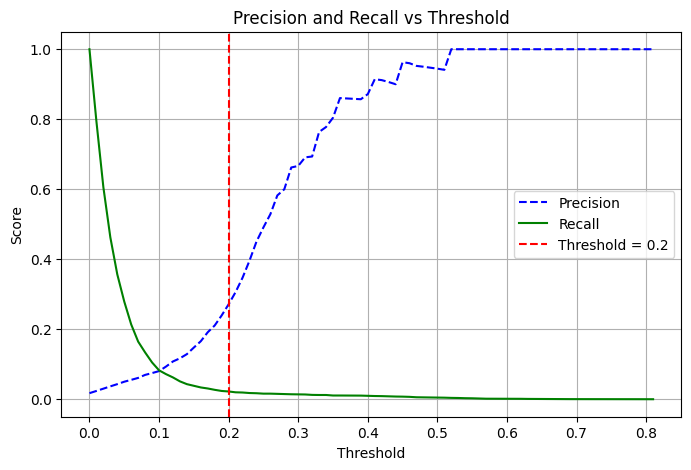

In [54]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_forest)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Automatcially find the best threshold 

In [55]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_forest)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)

best_idx = np.argmax(f1_scores)
best_threshold_forest = thresholds[best_idx]
print(f"✅ Best Threshold = {best_threshold_forest:.3f} with F1-score = {f1_scores[best_idx]:.3f}")


✅ Best Threshold = 0.080 with F1-score = 0.092


re-plot the best threshold

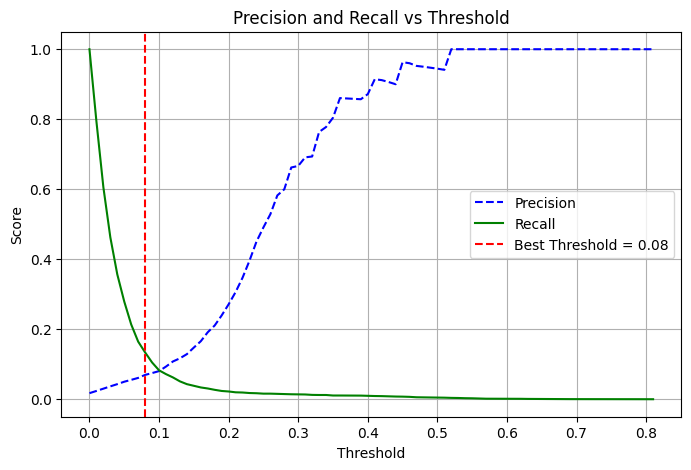

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=best_threshold_forest, color='red', linestyle='--', label=f'Best Threshold = {best_threshold_forest:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
y_pred_best = (y_probs_forest > best_threshold_forest).astype(int)
#evalute model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_best))

roc_auc = roc_auc_score(y_test,y_probs_forest)
print(f"\n ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[184779   4405]
 [  3034    357]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    189184
        True       0.07      0.11      0.09      3391

    accuracy                           0.96    192575
   macro avg       0.53      0.54      0.53    192575
weighted avg       0.97      0.96      0.96    192575


 ROC AUC Score: 0.6710


**Observations:**
1. Overall Accuracy ~ 96% - but not the main focus for imbalanced data
2. ROC AUC Score: 0.6710
3. Captured more fraud cases 357 cases


**Visualizing Precision vs Recall**

Applying SMOTE with Random Forest 

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Create the Random Forest model (you can still use class_weight='balanced' or not)
model3 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, n_jobs=-1)

# Step 3: Train the model on the resampled (balanced) data
model3.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on the original test data (no SMOTE on test set!)
y_pred_forest = model3.predict(X_test_scaled)
y_probs_forest = model3.predict_proba(X_test_scaled)[:,1]

# Step 5: Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

roc_auc = roc_auc_score(y_test, y_probs_forest)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[189010    174]
 [  3337     54]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    189184
        True       0.24      0.02      0.03      3391

    accuracy                           0.98    192575
   macro avg       0.61      0.51      0.51    192575
weighted avg       0.97      0.98      0.97    192575

ROC AUC Score: 0.6935


**After SMOTE using custom threshold**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Create the Random Forest model (you can still use class_weight='balanced' or not)
model3 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, n_jobs=-1)

# Step 3: Train the model on the resampled (balanced) data
model3.fit(X_train_resampled, y_train_resampled)
# Step 4: Predict probabilities on the original test data
y_probs_forest = model3.predict_proba(X_test_scaled)[:, 1]

# Choose your custom threshold (e.g., 0.08 or whatever you found best)
custom_threshold = 0.08

# Apply threshold to get predicted labels
y_pred_custom = (y_probs_forest > custom_threshold).astype(int)

# Step 5: Evaluate performance using the custom threshold predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_probs_forest)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[159251  29933]
 [  2083   1308]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.84      0.91    189184
        True       0.04      0.39      0.08      3391

    accuracy                           0.83    192575
   macro avg       0.51      0.61      0.49    192575
weighted avg       0.97      0.83      0.89    192575

ROC AUC Score: 0.6935


gridsearch CV tuning.... need to do...